# Data Analysis: Fraud Detection for Automobile Claims Dataset

<a id='overview-0'></a>

## [Overview](./0-AutoClaimFraudDetection.ipynb)
* **[1: Overview, Architecture, and Data Exploration](./0-AutoClaimFraudDetection.ipynb)**
  * **[DataSets and Exploratory Data Analysis](#nb0-data-explore)**
  * **[Exploratory Data Science and Operational ML workflows](#nb0-workflows)**
  * **[The ML Life Cycle: Detailed View](#nb0-ml-lifecycle)**


<a id ='nb0-data-explore'> </a>

## DataSets and Exploratory Visualizations
[Overview](#overview-0)

The dataset is synthetically generated and consists of <font color='green'> customers and claims </font> datasets.
Here we will load them and do some exploratory visualizations.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install seaborn==0.11.1
!pip install pandas --upgrade

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt  # visualisation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True)

df_claims = pd.read_csv("./data/claims.csv", index_col=0)
df_claims.head()

,driver_relationship,incident_type,collision_type,incident_severity,authorities_contacted,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,incident_dow,incident_hour,fraud
policy_id,,,,,,,,,,,,,,,,,
1,Spouse,Collision,Front,Minor,None,2,0,0,No,71600,8913.668763,80513.668763,3,17,6,8,0
2,Self,Collision,Rear,Totaled,Police,3,4,0,Yes,6400,19746.724395,26146.724395,12,11,2,11,0
3,Self,Collision,Front,Minor,Police,2,0,1,Yes,10400,11652.969918,22052.969918,12,24,1,14,0
4,Child,Collision,Side,Minor,None,2,0,0,No,104700,11260.930936,115960.930936,12,23,0,19,0
5,Self,Collision,Side,Major,Police,2,1,0,No,3400,27987.704652,31387.704652,5,8,2,8,0


## Let’s have a look at data dimensionality, feature names, and feature types.

In [3]:
print(df_claims.shape)

(5000, 17)


In [9]:
features=df_claims.columns[:-1]
features

Index(['driver_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'num_vehicles_involved',
       'num_injuries', 'num_witnesses', 'police_report_available',
       'injury_claim', 'vehicle_claim', 'total_claim_amount', 'incident_month',
       'incident_day', 'incident_dow', 'incident_hour'],
      dtype='object')

### We can use the info() method to output some general information about the dataframe:

In [4]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_relationship      4272 non-null   object 
 1   incident_type            5000 non-null   object 
 2   collision_type           4272 non-null   object 
 3   incident_severity        5000 non-null   object 
 4   authorities_contacted    5000 non-null   object 
 5   num_vehicles_involved    5000 non-null   int64  
 6   num_injuries             5000 non-null   int64  
 7   num_witnesses            5000 non-null   int64  
 8   police_report_available  5000 non-null   object 
 9   injury_claim             5000 non-null   int64  
 10  vehicle_claim            5000 non-null   float64
 11  total_claim_amount       5000 non-null   float64
 12  incident_month           5000 non-null   int64  
 13  incident_day             5000 non-null   int64  
 14  incident_dow            

In [ ]:
df_claims.describe()

In [16]:
df_claims['fraud'].value_counts()

0    4836
1     164
Name: fraud, dtype: int64

In [17]:
df_claims['incident_severity'].value_counts()

Minor      2100
Major      1698
Totaled    1202
Name: incident_severity, dtype: int64

In [18]:
df_claims['police_report_available'].value_counts()

No     2892
Yes    2108
Name: police_report_available, dtype: int64

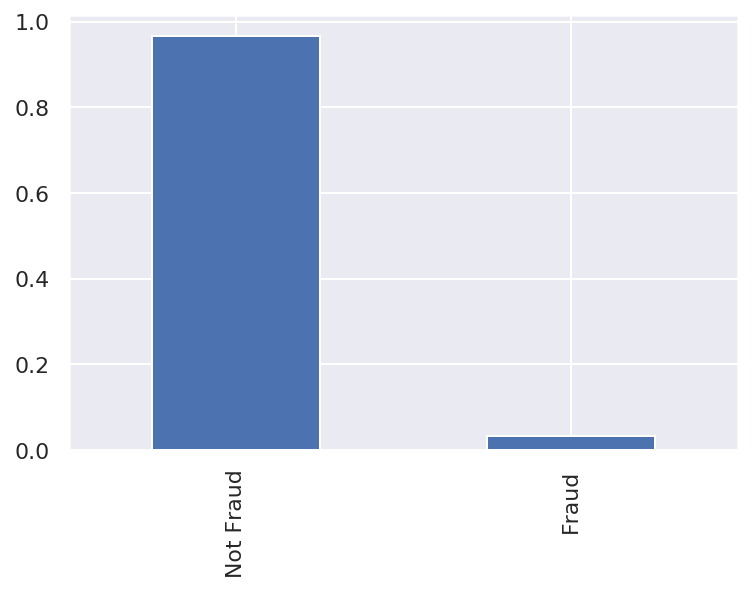

In [36]:
# plot the bar graph of fraudulent claims
# df_claims.fraud.value_counts(normalize=True)
df_claims['fraud'].value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ["Not Fraud", "Fraud"]);

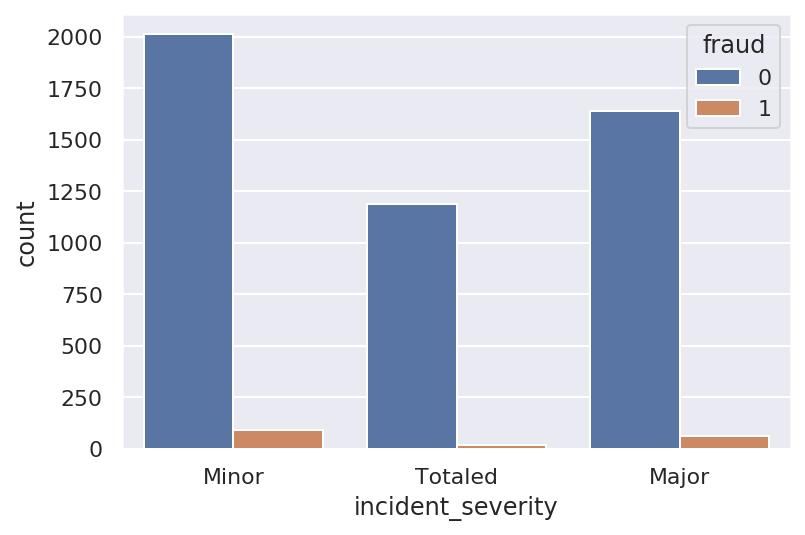

In [8]:
sns.countplot(x="incident_severity", hue="fraud", data=df_claims);

Text(0.5, 0, 'Total Claim Amount')

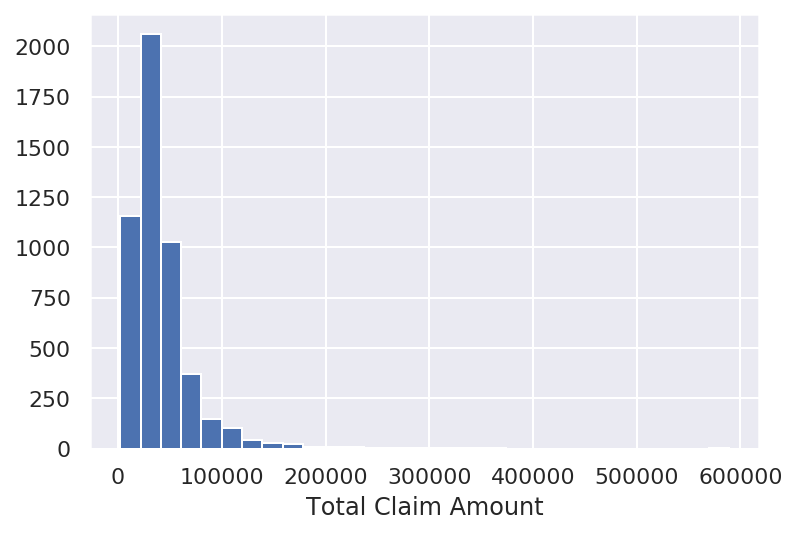

In [9]:
# plot the total claim amounts
plt.hist(df_claims.total_claim_amount, bins=30)
plt.xlabel("Total Claim Amount")

Text(0.5, 0, 'total_claim_amount')

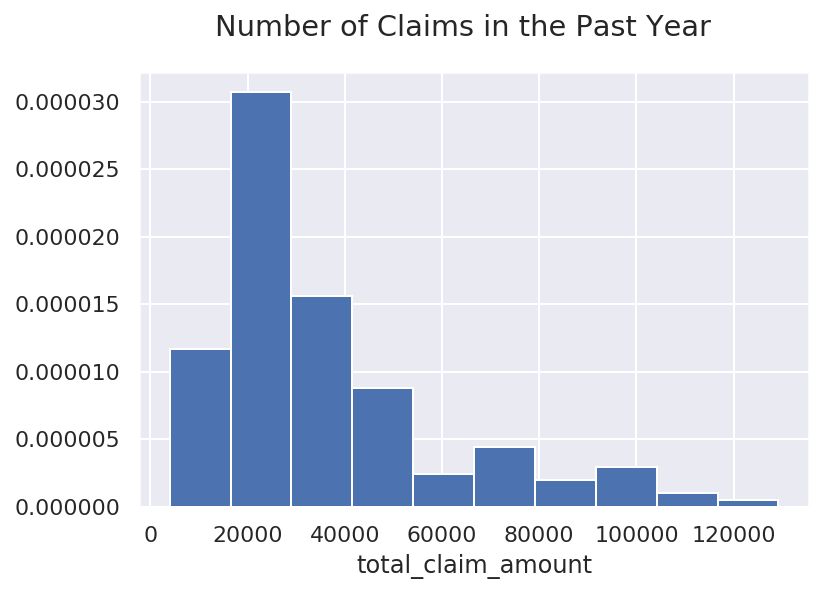

In [39]:
fraud_df = df_claims[df_claims['fraud'] > 0]
fraud_df.total_claim_amount.hist(density=True)
plt.suptitle("Number of Claims in the Past Year")
plt.xlabel("total_claim_amount")

In [13]:
df_claims_corr = df_claims.corr()

df_claims_corr

,num_vehicles_involved,num_injuries,num_witnesses,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,incident_dow,incident_hour,fraud
num_vehicles_involved,1.000000,0.399685,0.588598,0.017374,0.377065,0.132396,0.001166,-0.008149,0.001069,-0.008093,-0.089302
num_injuries,0.399685,1.000000,0.241282,0.007896,0.442037,0.143497,0.019168,0.002359,-0.008956,0.016804,-0.078511
num_witnesses,0.588598,0.241282,1.000000,0.027612,0.223365,0.094693,-0.006904,0.010582,0.010452,-0.021273,-0.075657
injury_claim,0.017374,0.007896,0.027612,1.000000,0.040384,0.951515,0.014523,0.010485,-0.019434,0.015744,-0.010797
vehicle_claim,0.377065,0.442037,0.223365,0.040384,1.000000,0.345777,-0.001300,0.012772,0.000264,0.009391,-0.063982
total_claim_amount,0.132396,0.143497,0.094693,0.951515,0.345777,1.000000,0.013238,0.013778,-0.018169,0.017676,-0.029836
incident_month,0.001166,0.019168,-0.006904,0.014523,-0.001300,0.013238,1.000000,-0.001751,-0.003906,0.003064,0.018510
incident_day,-0.008149,0.002359,0.010582,0.010485,0.012772,0.013778,-0.001751,1.000000,0.003092,0.017407,-0.020078
incident_dow,0.001069,-0.008956,0.010452,-0.019434,0.000264,-0.018169,-0.003906,0.003092,1.000000,0.033855,-0.015480
incident_hour,-0.008093,0.016804,-0.021273,0.015744,0.009391,0.017676,0.003064,0.017407,0.033855,1.000000,-0.001409


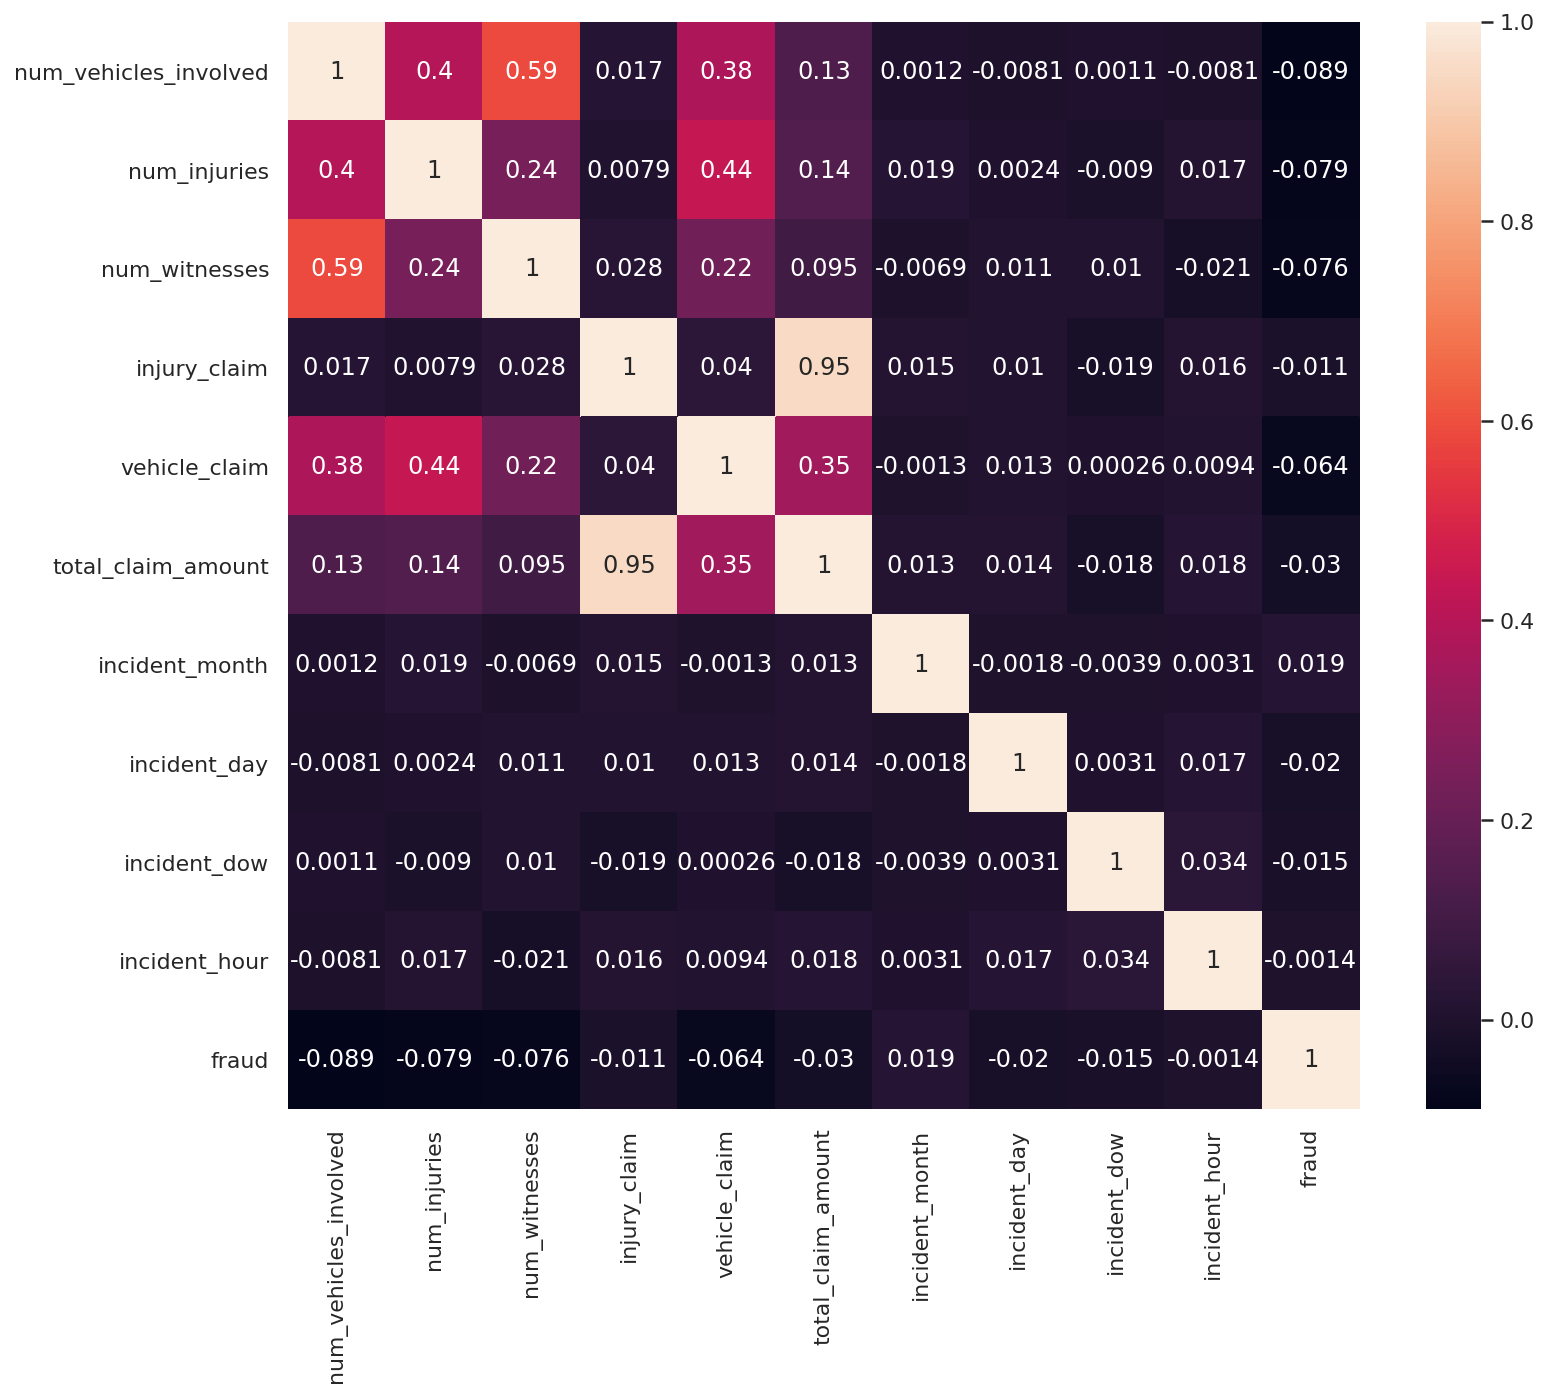

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df_claims_corr, annot=True)

___

### Next Notebook: [Data Preparation, Data Wrangler, Feature Store](./03-DataPrep-Wrangler-FeatureStore.ipynb)